## Reconhecimento de digitais

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from os import listdir
import pickle

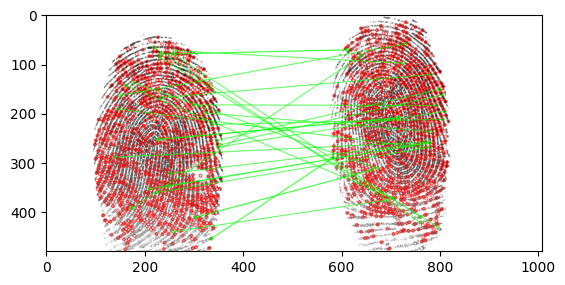

[32, 1682.0]


In [ ]:
def SIFTcomResultado(file1, file2):
    img1=cv2.imread(file1, cv2.IMREAD_GRAYSCALE)
    img2=cv2.imread(file2, cv2.IMREAD_GRAYSCALE)

    sift=cv2.SIFT_create(nOctaveLayers=4, contrastThreshold=0.12, sigma=2.5, enable_precise_upscale=True) 
    #valores sugeridos pelo artigo, com sigma exagerado pra remover pontos de interesse muito pequenos, gerados por regiões de baixa pressão
    kp1, des1=sift.detectAndCompute(img1, None)
    kp2, des2=sift.detectAndCompute(img2, None)

    index_params = dict(algorithm = 1, trees = 5) #alg=1 significa usar indexação em kdtree
    search_params = dict(checks=50)  #quantidade de pontos checados pelo knn
    
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    
    matches = flann.knnMatch(des1,des2,k=2)
    
    # Need to draw only good matches, so create a mask
    matchesMask = [[0,0] for i in range(len(matches))]
    counter=0
    # ratio test as per Lowe's paper
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.8*n.distance:
            counter+=1
            matchesMask[i]=[1,0]
    
    draw_params = dict(matchColor = (0,255,0),
                    singlePointColor = (255,0,0),
                    matchesMask = matchesMask,
                    flags = cv2.DrawMatchesFlags_DEFAULT)
    
    img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
    
    plt.imshow(img3,),plt.show()
    
    return [counter, (len(kp1)+len(kp2))/2]

def SIFT(file1, file2):
    img1=cv2.imread("imagens/"+file1, cv2.IMREAD_GRAYSCALE)
    img2=cv2.imread("imagens/"+file2, cv2.IMREAD_GRAYSCALE)

    sift=cv2.SIFT_create(nOctaveLayers=4, contrastThreshold=0.12, sigma=2.5, enable_precise_upscale=True) 
    #valores sugeridos pelo artigo, com sigma exagerado pra remover pontos de interesse muito pequenos, gerados por regiões de baixa pressão
    kp1, des1=sift.detectAndCompute(img1, None)
    kp2, des2=sift.detectAndCompute(img2, None)

    index_params = dict(algorithm = 1, trees = 5) #alg=1 significa usar indexação em kdtree
    search_params = dict(checks=50)  #quantidade de pontos verificados pelo knn 
    
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    
    matches = flann.knnMatch(des1,des2,k=2)
    
    # Need to draw only good matches, so create a mask
    counter=0
    # ratio test as per Lowe's paper
    for (m,n) in matches:
        if m.distance < 0.8*n.distance:
            counter+=1
    
    return [counter, (len(kp1)+len(kp2))/2]

print(SIFTcomResultado("imagens/012_3_1.tif", "imagens/012_8_3.tif"))

In [ ]:
from random import randint

files=listdir("imagens")

newFiles=list()
for i in range(len(files)//8):
    newFiles+=[files[8*i:8*(i+1)]]


treino=list()
teste=list()

for digital in newFiles:
    indice=randint(0,7)
    teste+=[digital.pop(indice)]
    treino+=[digital]

['012_3_1.tif', '012_4_1.tif', '012_5_2.tif', '012_6_2.tif', '012_7_8.tif', '012_8_1.tif', '013_3_1.tif', '013_4_6.tif', '013_5_1.tif', '013_6_1.tif', '013_7_7.tif', '013_8_7.tif', '017_3_2.tif', '017_4_3.tif', '017_5_4.tif', '017_6_8.tif', '017_7_6.tif', '017_8_5.tif', '022_3_7.tif', '022_4_3.tif', '022_5_3.tif', '022_6_1.tif', '022_7_6.tif', '022_8_8.tif', '027_3_5.tif', '027_4_7.tif', '027_5_2.tif', '027_6_4.tif', '027_7_7.tif', '027_8_5.tif', '045_3_4.tif', '045_4_7.tif', '045_5_1.tif', '045_6_3.tif', '045_7_2.tif', '045_8_1.tif', '047_3_3.tif', '047_4_1.tif', '047_5_4.tif', '047_6_1.tif', '047_7_5.tif', '047_8_6.tif', '057_3_6.tif', '057_4_7.tif', '057_5_7.tif', '076_3_6.tif', '076_4_6.tif', '076_5_3.tif', '076_6_7.tif', '076_7_5.tif', '076_8_3.tif']


In [ ]:
def classificador(treino, imagem):
    retorno=list()
    for digital in treino:
        score=0
        cossoro=list()
        for leitura in digital:
            res=SIFT(leitura, imagem)
            res=res[0]/res[1]
            cossoro.append(res)
            if(res<0.02):
                score=0
                break
            score+=res
        retorno.append(score/len(digital))
    return retorno

cont=1
succ=0
for arq in teste:
    if(max(classificador(treino, arq))>0.08): #precisa arrumar pra checar se o match realmente tá certo e não se o match foi significativo
        succ+=1
        print("sucesso", cont)
    cont+=1
print(succ)

sucesso 1
sucesso 2
sucesso 3
sucesso 4
sucesso 5
sucesso 6
sucesso 7
sucesso 8
sucesso 10
sucesso 12
sucesso 13
sucesso 14
sucesso 15
sucesso 16
sucesso 17
sucesso 18
sucesso 20
sucesso 23
sucesso 24
sucesso 26
sucesso 27
sucesso 30
sucesso 32
sucesso 33
sucesso 34
sucesso 35
sucesso 36
sucesso 37
sucesso 38
sucesso 39
sucesso 40
sucesso 42
sucesso 44
sucesso 45
sucesso 46
sucesso 47
sucesso 48
sucesso 49
sucesso 51
39


In [93]:
def writeFeatures(kp, des, fileName):
    index1 = []
    for point in kp:
        temp = (point.pt, point.size, point.angle, point.response, point.octave, 
            point.class_id) 
        index1.append(temp)
    file=open("keypoints/"+fileName+".pkl", "wb")
    pickle.dump(index1, file)
    file.close()
    file=open("descritores/"+fileName+".npy", "wb")
    np.save(file, des)
    file.close()   

def readFeatures(fileName):
    file=open("descritores/"+fileName+".npy", "rb")
    des=np.load(file)
    file.close()

    index = pickle.load(open("keypoints/"+fileName+".pkl", "rb"))
    kp = []

    for point in index:
        temp = cv2.KeyPoint(x=point[0][0],y=point[0][1],size=point[1], angle=point[2], 
                                response=point[3], octave=point[4], class_id=point[5]) 
        kp.append(temp)
    return [kp, des]


In [95]:
sift=cv2.SIFT_create(nOctaveLayers=4, contrastThreshold=0.12, sigma=2.5, enable_precise_upscale=True) 
for file in listdir("imagens"):
    img=cv2.imread("imagens/"+file, cv2.IMREAD_GRAYSCALE)
    kp, des=sift.detectAndCompute(img, None)
    file=file[0:len(file)-4]
    writeFeatures(kp, des, file)

In [109]:
def SIFTcomResultado(file1, file2):
    img1=cv2.imread("imagens/"+file1+".tif", cv2.IMREAD_GRAYSCALE)
    img2=cv2.imread("imagens/"+file2+".tif", cv2.IMREAD_GRAYSCALE)

    sift=cv2.SIFT_create(nOctaveLayers=4, contrastThreshold=0.12, sigma=2.5, enable_precise_upscale=True) 
    #valores sugeridos pelo artigo, com sigma exagerado pra remover pontos de interesse muito pequenos, gerados por regiões de baixa pressão
    lista=readFeatures(file1)
    kp1, des1=lista[0], lista[1]
    kp2, des2=sift.detectAndCompute(img2, None)

    index_params = dict(algorithm = 1, trees = 5) #alg=1 significa usar indexação em kdtree
    search_params = dict(checks=50)  #quantidade de pontos checados pelo knn
    
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    
    matches = flann.knnMatch(des1,des2,k=2)
    
    # Need to draw only good matches, so create a mask
    matchesMask = [[0,0] for i in range(len(matches))]
    counter=0
    # ratio test as per Lowe's paper
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.8*n.distance:
            counter+=1
            matchesMask[i]=[1,0]
    
    draw_params = dict(matchColor = (0,255,0),
                    singlePointColor = (255,0,0),
                    matchesMask = matchesMask,
                    flags = cv2.DrawMatchesFlags_DEFAULT)
    
    img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
    
    plt.imshow(img3,),plt.show()
    
    return [counter, (len(kp1)+len(kp2))/2]

def SIFT(file1, kp2, des2):
    #valores sugeridos pelo artigo, com sigma exagerado pra remover pontos de interesse muito pequenos, gerados por regiões de baixa pressão
    lista=readFeatures(file1)
    kp1, des1=lista[0], lista[1]

    index_params = dict(algorithm = 1, trees = 5) #alg=1 significa usar indexação em kdtree
    search_params = dict(checks=50)  #quantidade de pontos checados pelo knn
    
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    
    matches = flann.knnMatch(des1,des2,k=2)
    
    # Need to draw only good matches, so create a mask
    counter=0
    # ratio test as per Lowe's paper
    for (m,n) in matches:
        if m.distance < 0.8*n.distance:
            counter+=1

    return [counter, (len(kp1)+len(kp2))/2]

In [ ]:
from random import randint

files=[]

for str in listdir("imagens"):
    files+=[str[0:len(str)-4]]


newFiles=list()
for i in range(len(files)//8):
    newFiles+=[files[8*i:8*(i+1)]]

treino=list()
teste=list()
for digital in newFiles:
    indice=randint(0,7)
    teste+=[digital.pop(indice)]
    treino+=[digital]

def classificador(treino, imagem):
    imagem=cv2.imread("imagens/"+imagem+".tif", cv2.IMREAD_GRAYSCALE)
    sift=cv2.SIFT_create(nOctaveLayers=4, contrastThreshold=0.12, sigma=2.5, enable_precise_upscale=True) 
    kp2, des2=sift.detectAndCompute(imagem, None)
    retorno=list()
    for digital in treino:
        score=0
        cossoro=list()
        for leitura in digital:
            res=SIFT(leitura, kp2, des2)
            res=res[0]/res[1]
            cossoro.append(res)
            if(res<0.02):
                score=0
                break
            score+=res
        retorno.append(score/len(digital))
    return retorno

cont=1
succ=0
for arq in teste:
    if(max(classificador(treino, arq))>0.08): #precisa arrumar pra checar se o match realmente tá certo e não se o match foi significativo
        succ+=1
        print("sucesso", cont)
    cont+=1
print(succ)

sucesso 1


KeyboardInterrupt: 